In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import math

In [2]:
# Reading the Dataset
df = pd.read_csv('datasets/dataset_1.csv')

In [3]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [4]:
df.shape

(336, 7)

In [5]:
df['Date'].isnull().sum()

321

In [6]:
df = df.fillna(method = 'ffill')

In [7]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

## Finding the date with most completed trips

In [8]:
df[['Date','Completed Trips ']].groupby(by = 'Date').sum().sort_values(by = 'Completed Trips ',ascending = False)

,Completed Trips
Date,
22-Sep-12,248
15-Sep-12,199
21-Sep-12,190
23-Sep-12,111
14-Sep-12,108
16-Sep-12,93
12-Sep-12,91
20-Sep-12,70
17-Sep-12,57


### As we can see that 22 Sep is the date on which there were most completed trips

## Finding the maximum number of trips completed in a 24 hour period

In [9]:
df['Time (Local)'] = df['Time (Local)'].astype(str)
df['Datetime'] =  df['Date']+ ' '+ df['Time (Local)']

In [10]:
df['Datetime']

0       10-Sep-12 7
1       10-Sep-12 8
2       10-Sep-12 9
3      10-Sep-12 10
4      10-Sep-12 11
           ...     
331     24-Sep-12 2
332     24-Sep-12 3
333     24-Sep-12 4
334     24-Sep-12 5
335     24-Sep-12 6
Name: Datetime, Length: 336, dtype: object

In [11]:
df['Datetime'] = df['Datetime'].apply(lambda x: datetime.strptime(x,'%d-%b-%y %H'))

In [12]:
df['Datetime']

0     2012-09-10 07:00:00
1     2012-09-10 08:00:00
2     2012-09-10 09:00:00
3     2012-09-10 10:00:00
4     2012-09-10 11:00:00
              ...        
331   2012-09-24 02:00:00
332   2012-09-24 03:00:00
333   2012-09-24 04:00:00
334   2012-09-24 05:00:00
335   2012-09-24 06:00:00
Name: Datetime, Length: 336, dtype: datetime64[ns]

In [13]:
trips_by_time = df[['Datetime','Completed Trips ']]

In [14]:
trips_by_time = trips_by_time.set_index('Datetime')

In [15]:
trips_by_time

,Completed Trips
Datetime,
2012-09-10 07:00:00,2
2012-09-10 08:00:00,2
2012-09-10 09:00:00,0
2012-09-10 10:00:00,0
2012-09-10 11:00:00,4
...,...
2012-09-24 02:00:00,0
2012-09-24 03:00:00,0
2012-09-24 04:00:00,0


In [16]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs = df.set_index("Datetime").rolling(window=indexer, min_periods=1).sum()
df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')

/var/folders/zq/z9tt8wfn4psfglvz008pzfpm0000gn/T/ipykernel_2213/2884333849.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_twentyfour_hrs = df.set_index("Datetime").rolling(window=indexer, min_periods=1).sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Datetime,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


### As we can see in the above table that maximum number of completed trips in 24 hours occurred in the hour starting from 2012-09-21 17:00:00

## Finding the hour with most requests

In [17]:
df.groupby(by = 'Time (Local)').sum().sort_values(by = 'Requests ')

,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Time (Local),,,,,
4,29,21,2,9,9
5,42,31,4,14,11
7,111,30,19,22,60
9,202,39,20,26,110
10,243,46,18,28,129
6,78,32,19,28,37
8,151,30,24,29,95
3,83,30,21,35,40
11,264,47,36,47,133


### As we can see in the table above that the maximum number of requests have been raised at the 24th hour( 11:00 p.m.-12:00 a.m.).

## Finding all zeroes during weekends

In [18]:
df['Date'].dtype

dtype('O')

In [19]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00
...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00


In [20]:
weekdays = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
df_dates = df.copy()
df_dates['Date']
df_dates['day'] = df_dates['Date'].apply(lambda x: weekdays[datetime.strptime(x,'%d-%b-%y').weekday()])

In [21]:
df_weekend = df_dates[df_dates['day'].isin(['Fri','Sat','Sun'])]

In [22]:
df_weekend['Time (Local)'] = df_weekend['Time (Local)'].astype(int)
drop_ride = df_weekend[(df_weekend['Time (Local)']<17) & (df_weekend['day']=='Fri')].index
df_week = df_weekend.drop(drop_ride)

/var/folders/zq/z9tt8wfn4psfglvz008pzfpm0000gn/T/ipykernel_2213/3952437751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekend['Time (Local)'] = df_weekend['Time (Local)'].astype(int)


In [23]:
df_week

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,day
106,14-Sep-12,17,34,4,3,5,13,2012-09-14 17:00:00,Fri
107,14-Sep-12,18,40,2,8,9,14,2012-09-14 18:00:00,Fri
108,14-Sep-12,19,46,6,9,10,15,2012-09-14 19:00:00,Fri
109,14-Sep-12,20,38,4,8,9,14,2012-09-14 20:00:00,Fri
110,14-Sep-12,21,49,6,8,9,17,2012-09-14 21:00:00,Fri
...,...,...,...,...,...,...,...,...,...
324,23-Sep-12,19,32,9,4,6,11,2012-09-23 19:00:00,Sun
325,23-Sep-12,20,29,6,3,3,7,2012-09-23 20:00:00,Sun
326,23-Sep-12,21,24,6,3,4,5,2012-09-23 21:00:00,Sun
327,23-Sep-12,22,17,2,2,2,6,2012-09-23 22:00:00,Sun


In [24]:
drop_ride = df_weekend[(df_weekend['Time (Local)']>3) & (df_weekend['day']=='Sun')].index
df_week = df_week.drop(drop_ride)

In [25]:
df_week

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,day
106,14-Sep-12,17,34,4,3,5,13,2012-09-14 17:00:00,Fri
107,14-Sep-12,18,40,2,8,9,14,2012-09-14 18:00:00,Fri
108,14-Sep-12,19,46,6,9,10,15,2012-09-14 19:00:00,Fri
109,14-Sep-12,20,38,4,8,9,14,2012-09-14 20:00:00,Fri
110,14-Sep-12,21,49,6,8,9,17,2012-09-14 21:00:00,Fri
...,...,...,...,...,...,...,...,...,...
304,22-Sep-12,23,99,59,25,44,17,2012-09-22 23:00:00,Sat
305,23-Sep-12,0,62,25,23,32,18,2012-09-23 00:00:00,Sun
306,23-Sep-12,1,38,1,15,23,18,2012-09-23 01:00:00,Sun
307,23-Sep-12,2,34,4,13,18,18,2012-09-23 02:00:00,Sun


In [26]:
(df_week['Zeroes '].sum()/df['Zeroes '].sum())*100

45.066480055983206

### As we see around 45.1% of all Zeroes are present on weekends

## Finding the weighted average of completed trips per driver

In [27]:
df['trips_per_driver'] = df['Completed Trips ']/df['Unique Drivers']

In [28]:
df_without_zero_drivers = df[df['Unique Drivers']>0]

In [29]:
df_without_zero_drivers

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,trips_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0.363636
...,...,...,...,...,...,...,...,...,...
327,23-Sep-12,22,17,2,2,2,6,2012-09-23 22:00:00,0.333333
328,23-Sep-12,23,9,3,3,3,3,2012-09-23 23:00:00,1.000000
329,24-Sep-12,0,7,2,1,2,2,2012-09-24 00:00:00,0.500000
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0.333333


In [30]:
weighted_avg = np.average(df_without_zero_drivers['trips_per_driver'],weights = df_without_zero_drivers['Completed Trips '])

In [31]:
weighted_avg

0.8282775715092395

### We can observe that the weighted average is 0.828

## Finding the busiest 8 hour shift 

In [32]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,trips_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0.363636


In [33]:
df_eight_hrs = df.set_index('Datetime').resample('8H').sum()

In [34]:
df_eight_hrs.sort_values(by = 'Requests ',ascending = False)

,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trips_per_driver
Datetime,,,,,,
2012-09-21 16:00:00,515,88,153,192,198,6.357265
2012-09-22 16:00:00,469,113,127,175,142,7.314552
2012-09-15 16:00:00,436,152,112,170,107,8.299235
2012-09-14 16:00:00,353,46,81,95,121,4.997644
2012-09-22 08:00:00,325,78,70,91,77,6.780556
2012-09-23 00:00:00,178,50,63,90,77,5.395833
2012-09-22 00:00:00,166,28,51,78,73,NaN
2012-09-15 00:00:00,155,34,63,74,59,5.335526
2012-09-20 16:00:00,232,33,53,68,88,4.667347


### We can observe that the maximum number of requests are in the interval 2012-09-21 16:00:00 - 2012-09-22 00:00:00. Also note that the top 4 total number of requests are all starting from 16:00 hrs so we can infer that it is the busiest 8 hour shift

## Comparing the driver supply and trip demand over the two weeks

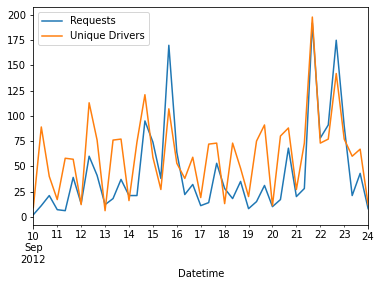

In [35]:
df_eight_hrs[['Requests ','Unique Drivers']].plot()
plt.show()

### From the above graph it seems the supply of drivers increase with the increase in demand

## Finding the 72 hour period with the highest Zeroes to Eyeballs ratio

In [36]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_three_days = df.set_index("Datetime").rolling(window=indexer, min_periods=1).sum().reset_index()
df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes '] / df_agg_three_days['Eyeballs ']

/var/folders/zq/z9tt8wfn4psfglvz008pzfpm0000gn/T/ipykernel_2213/1657940379.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_three_days = df.set_index("Datetime").rolling(window=indexer, min_periods=1).sum().reset_index()


In [37]:
df_agg_three_days = df_agg_three_days[df_agg_three_days['Datetime'] <= (df_agg_three_days['Datetime'].max() - pd.Timedelta(days=3))]

time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days['Datetime'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Datetime'] + pd.Timedelta('3 days')).dt.strftime(time_format)
df_agg_three_days

,Datetime,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trips_per_driver,zeros_to_eyeballs_ratio,Time Interval
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,20.807776,0.179916,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,20.835553,0.180021,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,20.817696,0.180498,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,20.817696,0.180412,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,21.017696,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...,...
259,2012-09-21 02:00:00,828.0,2209.0,465.0,535.0,724.0,780.0,39.191989,0.210502,2012/09/21 02:00-2012/09/24 02:00
260,2012-09-21 03:00:00,828.0,2207.0,468.0,534.0,724.0,775.0,38.991989,0.212053,2012/09/21 03:00-2012/09/24 03:00
261,2012-09-21 04:00:00,828.0,2207.0,468.0,534.0,725.0,775.0,38.991989,0.212053,2012/09/21 04:00-2012/09/24 04:00
262,2012-09-21 05:00:00,828.0,2208.0,469.0,534.0,725.0,775.0,38.991989,0.212409,2012/09/21 05:00-2012/09/24 05:00


In [38]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')

,Datetime,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trips_per_driver,zeros_to_eyeballs_ratio,Time Interval
118,2012-09-15 05:00:00,828.0,1495.0,438.0,292.0,431.0,454.0,37.088176,0.292977,2012/09/15 05:00-2012/09/18 05:00


### The interval shown in the above row has the maximum ratio of zeroes to eyeball 0.293. It is for the 72 hour interval from 2012-09-15 05:00:00 - 2012-09-18 05:00:00

## Finding the busiest hour in the two weeks with a highest demand to supply ratio

In [39]:
df['Time (Local)'].dtype

dtype('O')

In [40]:
df['Time (Local)'] = df['Time (Local)'].astype(int)

In [41]:
df_agg = df.groupby(by = 'Time (Local)').sum()

In [42]:
df_agg

,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trips_per_driver
Time (Local),,,,,,
0,339,81,102,142,111,8.519786
1,207,43,71,96,94,7.555952
2,170,52,61,100,62,7.588889
3,83,30,21,35,40,2.133929
4,29,21,2,9,9,2.000000
5,42,31,4,14,11,NaN
6,78,32,19,28,37,6.152381
7,111,30,19,22,60,5.157937
8,151,30,24,29,95,4.293543


In [43]:
df_agg['eyeball_to_driver'] = df_agg['Eyeballs ']/df_agg['Unique Drivers']

In [44]:
df_agg.sort_values(by = 'eyeball_to_driver')

,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trips_per_driver,eyeball_to_driver
Time (Local),,,,,,,
8,151,30,24,29,95,4.293543,1.589474
9,202,39,20,26,110,3.340476,1.836364
7,111,30,19,22,60,5.157937,1.850000
10,243,46,18,28,129,2.752778,1.883721
11,264,47,36,47,133,4.081692,1.984962
3,83,30,21,35,40,2.133929,2.075000
12,278,41,46,53,132,5.078788,2.106061
6,78,32,19,28,37,6.152381,2.108108
1,207,43,71,96,94,7.555952,2.202128


### As we see in the above table the hour starting at 23:00 has the highest ratio of eyeballs to unique drivers. This is the hour at which we should add more drivers to decrease this ratio

## Finding out if the data available is for exactly to weeks

In [45]:
df_sorted = df.sort_values(by = 'Datetime')

In [46]:
df_sorted

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,trips_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0.363636
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,NaN
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,NaN
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,NaN
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0.333333


In [47]:
total_time_difference = df_sorted['Datetime'].iloc[-1] - df_sorted['Datetime'].iloc[0]

In [48]:
total_time_difference

Timedelta('13 days 23:00:00')

### The total time covered by the records is 1 hour less than 2 weeks

## Finding the hour with the least supply and least demand

In [49]:
print ("minimum supply :")
print ("\n")
print (df_agg[df_agg['Unique Drivers']==min(df_agg['Unique Drivers'])])
print ("\n")
print ("minimum demand")
print ("\n")
print (df_agg[df_agg['Eyeballs ']==min(df_agg['Eyeballs '])])

minimum supply :


              Eyeballs   Zeroes   Completed Trips   Requests   Unique Drivers  \
Time (Local)                                                                    
4                    29       21                 2          9               9   

              trips_per_driver  eyeball_to_driver  
Time (Local)                                       
4                          2.0           3.222222  


minimum demand


              Eyeballs   Zeroes   Completed Trips   Requests   Unique Drivers  \
Time (Local)                                                                    
4                    29       21                 2          9               9   

              trips_per_driver  eyeball_to_driver  
Time (Local)                                       
4                          2.0           3.222222  


In [50]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime,trips_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0.363636
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,NaN
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,NaN
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,NaN
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0.333333


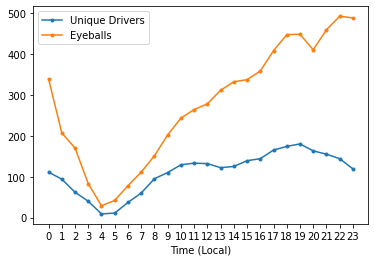

In [51]:
df_agg[['Unique Drivers','Eyeballs ']].plot(style='.-')
plt.xticks(np.arange(min(df_agg.index), max(df_agg.index)+1, 1.0))

plt.show()

### We see in the table and plot above that both the supply and demand are at the minimum at 04:00 hrs